In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


<Axes: xlabel='Churn'>

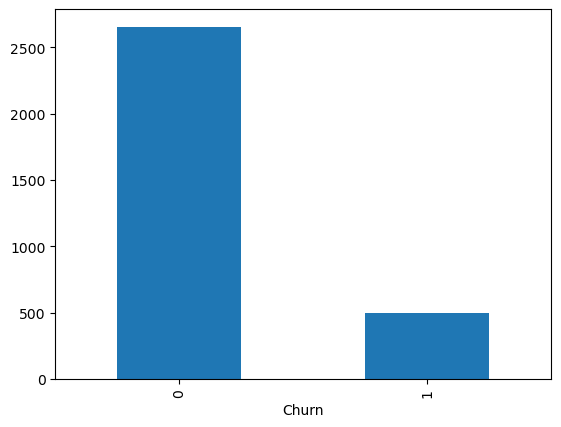

In [3]:
df.Churn.value_counts().plot(kind='bar')

In [4]:
df.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [5]:
X = df.drop('Churn', axis='columns')

In [6]:
y = df['Churn']

### Training Model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

result = classification_report(y_test, y_pred)

print(result)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       794
           1       0.64      0.25      0.36       151

    accuracy                           0.86       945
   macro avg       0.76      0.61      0.64       945
weighted avg       0.84      0.86      0.83       945



C:\Users\yuvra\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
y_train.value_counts()

Churn
0    1861
1     344
Name: count, dtype: int64

### Using Under Sampling before Training

In [9]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=12)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
y_train_rus.value_counts()

Churn
0    344
1    344
Name: count, dtype: int64

In [10]:
model = LogisticRegression()
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test)

result = classification_report(y_test, y_pred)

print(result)

              precision    recall  f1-score   support

           0       0.97      0.73      0.83       794
           1       0.38      0.87      0.53       151

    accuracy                           0.75       945
   macro avg       0.67      0.80      0.68       945
weighted avg       0.87      0.75      0.78       945



C:\Users\yuvra\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Scaling, Under Sampling and Training

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [12]:
rus = RandomUnderSampler(random_state=12)
X_train_rus, y_train_rus = rus.fit_resample(X_train_sc, y_train)

In [13]:
model = LogisticRegression()
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test_sc)

result = classification_report(y_test, y_pred)

print(result)

              precision    recall  f1-score   support

           0       0.98      0.84      0.91       794
           1       0.52      0.92      0.67       151

    accuracy                           0.85       945
   macro avg       0.75      0.88      0.79       945
weighted avg       0.91      0.85      0.87       945



### Using Over Sampling SMOTE before Training

In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=12)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train_smote.value_counts()

Churn
0    1861
1    1861
Name: count, dtype: int64

In [16]:
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

result = classification_report(y_test, y_pred)

print(result)

              precision    recall  f1-score   support

           0       0.97      0.73      0.83       794
           1       0.39      0.89      0.54       151

    accuracy                           0.76       945
   macro avg       0.68      0.81      0.69       945
weighted avg       0.88      0.76      0.79       945



C:\Users\yuvra\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Using SMOTETomek before Training

In [17]:
from imblearn.combine import SMOTETomek

tomek = SMOTETomek(random_state=42)
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)
y_train_tomek.value_counts()


Churn
0    1820
1    1820
Name: count, dtype: int64

In [18]:
model = LogisticRegression()
model.fit(X_train_tomek, y_train_tomek)

y_pred = model.predict(X_test)

result = classification_report(y_test, y_pred)

print(result)

              precision    recall  f1-score   support

           0       0.97      0.72      0.83       794
           1       0.38      0.90      0.53       151

    accuracy                           0.75       945
   macro avg       0.68      0.81      0.68       945
weighted avg       0.88      0.75      0.78       945



C:\Users\yuvra\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Using Ensemble Learning

In [21]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

tomek = SMOTETomek(random_state=42)
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train_sc, y_train)

vc = VotingClassifier([
    ('lr', LogisticRegression()),('svc', SVC()),('tree', DecisionTreeClassifier())
])

vc.fit(X_train_tomek, y_train_tomek)

y_pred_vc = vc.predict(X_test_sc)
result = classification_report(y_test, y_pred_vc)

print(result)


              precision    recall  f1-score   support

           0       0.99      0.88      0.93       794
           1       0.60      0.96      0.74       151

    accuracy                           0.89       945
   macro avg       0.79      0.92      0.83       945
weighted avg       0.93      0.89      0.90       945

